In [3]:
from sklearn.utils.fixes import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [5]:
bills= pd.read_csv("https://gist.githubusercontent.com/javierIA/52184893d57d9a644e2362ee108cfa9e/raw/7297193ea28a0ebed89cb230034a0e62043fe288/bills.csv")

In [7]:
bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1500 non-null   int64  
 1   is_genuine    1500 non-null   int64  
 2   diagonal      1500 non-null   float64
 3   height_left   1500 non-null   float64
 4   height_right  1500 non-null   float64
 5   margin_low    1500 non-null   float64
 6   margin_up     1500 non-null   float64
 7   length        1500 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 93.9 KB


In [8]:
bills.shape

(1500, 8)

In [9]:
bills.head(5)

,Unnamed: 0,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [11]:
x=np.array(bills.drop(["is_genuine","Unnamed: 0"],axis=1))

In [13]:
x

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       ...,
       [171.8 , 104.01, 104.12,   5.51,   3.36, 111.95],
       [172.06, 104.28, 104.06,   5.17,   3.46, 112.25],
       [171.47, 104.15, 103.82,   4.63,   3.37, 112.07]])

In [15]:
y=np.array(bills["is_genuine"])

In [16]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [26]:
y_train.shape

(1050,)

In [27]:
clf=KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)

In [28]:
clf.score(x_train,y_train)

0.9914285714285714

In [29]:
clf.score(x_test,y_test)

0.9888888888888889

In [30]:
y_predit_test=clf.predict(x_test)

In [32]:
cr=classification_report(y_test,y_predit_test)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       161
           1       0.99      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [34]:
import seaborn as sns

cn=confusion_matrix(y_test,y_predit_test)
cn

array([[157,   4],
       [  1, 288]])

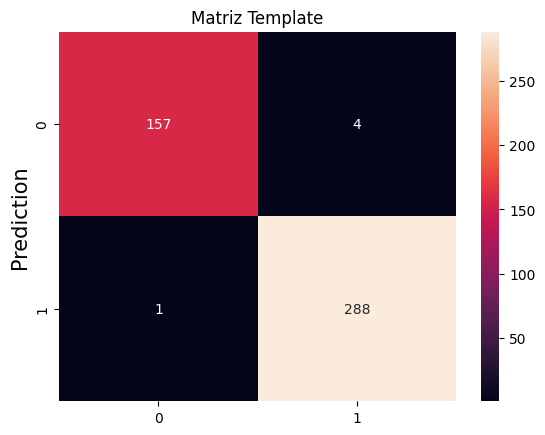

In [43]:
sns.heatmap(cn, annot=True, fmt="g")
plt.ylabel("Prediction", fontsize=15)
plt.title("Matriz Template")
plt.show()

In [44]:
sns.pairplot(bills,hue="is_genuine")
plt.show()

Output hidden; open in https://colab.research.google.com to view.